# Géométrie 3D avec pyvista

Pour le réaliser sans installation, depuis un navigateur :
<a href="https://colab.research.google.com/github/eddes/INSA/blob/main/python/tuto_pyvista.ipynb"> ça se passe ici<a>

Il peut être utile de savoir récupérer ou créer des informations géométriques 3D afin de mener des calculs, par exemple pour évaluer un facteur de forme de rayonnement thermique entre surfaces, ou pour recréer une surface 3D à partir d'un nuage de points relevés en topographie. Le package pyvista permet de faciliter la réalisation des ces tâches.
    
## Utilisation de pyvista
    
En prérequis, un petit `pip install pyvista` en console afin d'installer le package pyvista.


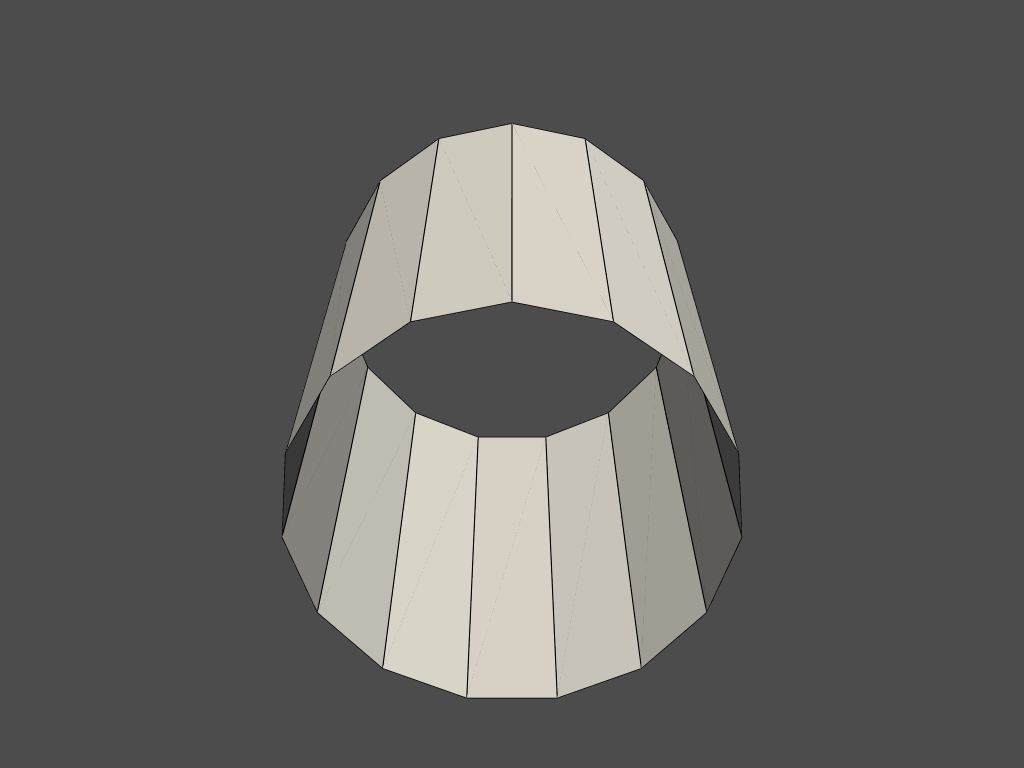

In [1]:
import pyvista as pv
pv.set_jupyter_backend('static') # pour le 

x,y,z=0,0,0
nb_faces=15
rayon=2
H=5

cylindre = pv.Cylinder(center=(x, y, z+H), direction=(0, 0, 1), 
                     radius=rayon, height=H, resolution=nb_faces,
                     capping=False)

# ajouter une fenetre interactive (sur jupyterlab... pas sûr)
# ici en changeant True/False on a accès à la fenêtre interactive ou non 
plotter=pv.Plotter(notebook=True)

# on ajoute l'objet 3D créé dans la fenêtre interactive
plotter.add_mesh(cylindre, show_edges=True)

# ici la position initiale de la "caméra" : on pourra tester differentes choses
plotter.show(cpos=[0,-0.5,-1])

# et on sauve en STL (glisser le fichier obtenu dans PowerPoint pour voir...)
cylindre.save('./src/cylindre.stl')
#cylindre.save('./src/cylindre.vtk') # on peut aussi sauver en VTK pour pouvoir ajouter des valeurs de champs sur les faces (temperature, facteu de forme, altitude...)


### Exercice

À vous de jouer : ajoutez une sphère à la 3D ainsi créée : <a href="https://docs.pyvista.org/version/stable/api/utilities/_autosummary/pyvista.Sphere.html"> la doc pour une sphère<a> 
    
et faites la tourner autour d'un axe avec la rotation : <a href="https://docs.pyvista.org/version/stable/examples/01-filter/rotate.html#rotations"> des exemples d'utilisation<a>.


## Lecture d'un fichier
    
Les géométries dans l'ingénierie sont souvent récupérées sous la forme de fichiers `.stl` ou `.obj` ou `.vtk`. Dans ce qui suit on se propose d'apprendre à lire un fichier géométrique en 3D et de stocker des valeurs pour chaque facette.

PolyData (0x11a6f969ac0)
  N Cells:	2136
  N Points:	1216
  X Bounds:	-3.655e+02, 2.152e+02
  Y Bounds:	-4.476e+02, 9.083e+01
  Z Bounds:	-2.971e-03, 2.760e+01
  N Arrays:	0



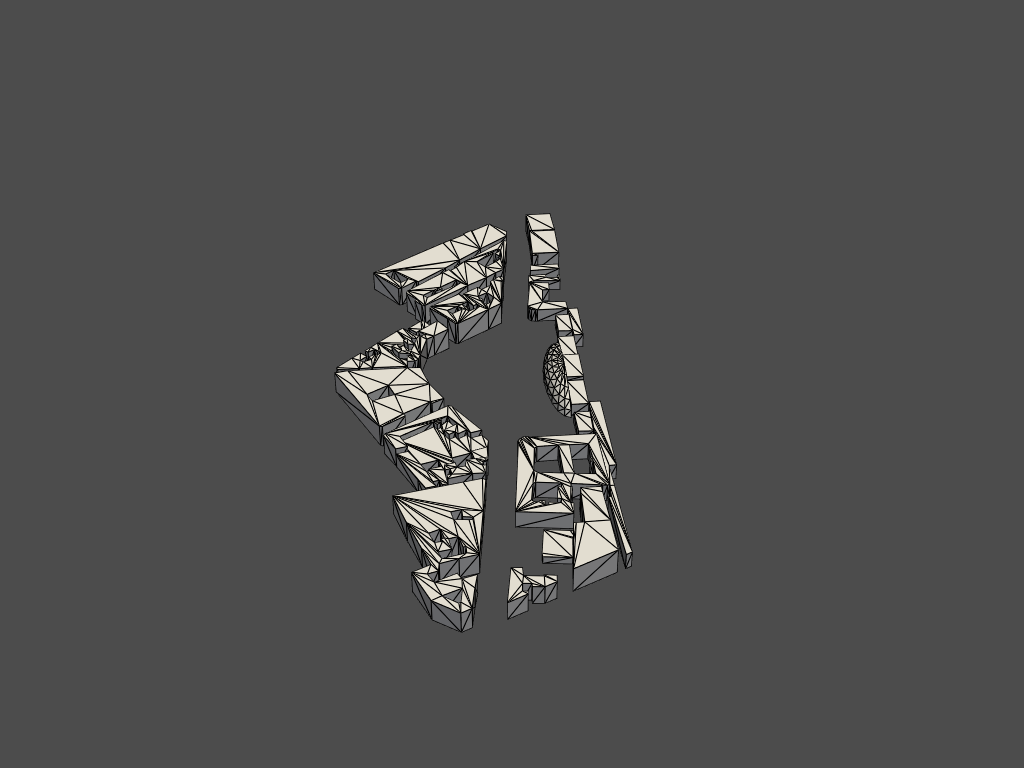

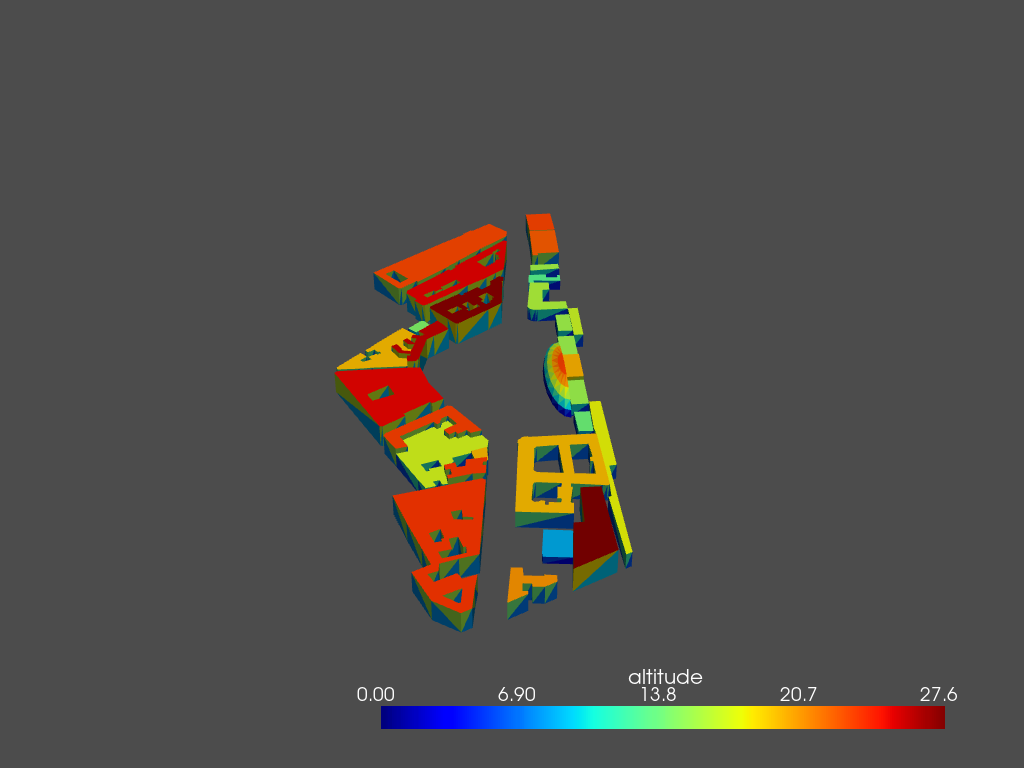

In [5]:
import pyvista as pv

# on lit le maillage
mesh  = pv.read("./src/gare_et_environnement.stl")

# que contient-il ?
print(mesh)

# on l'affiche
plotter=pv.Plotter(notebook=True)
plotter.add_mesh(mesh,show_edges=True)
plotter.show()

# on calcule l'altitude de chaque centre de cellule
centres_cellules = mesh.cell_centers() 
altitude = centres_cellules.points[:,2] # on prend la coordonnee en z
# on sauve l'altitude dans un vecteur à part, qui est associé à chaque facette du maillage
mesh["altitude"]=altitude


# ensuite on recommence: on ouvre une nouvelle fenetre
plotter=pv.Plotter(notebook=True)
# on affiche la valeur de l'altitude calculee pour chaque surface du modele
plotter.add_mesh(mesh, scalars='altitude', cmap='jet')
plotter.show() # et on affiche

# on sauve en VTK (s'ouvre avec le logiciel libre Paraview)
mesh.save("./src/envt.vtk") # on peut l'explorer avec https://kitware.github.io/glance/app/

Vous pouvez visualiser le fichier VTK produit :

 * soit directement en ligne <a href="https://kitware.github.io/glance/app/"> https://kitware.github.io/glance/app/<a>, 
 * soit avec <a href="https://www.paraview.org/download/"> Paraview<a>  (comme beaucoup de choses ici, c'est open source).


## Création d'une surface à partir d'un nuage de points

    [en cours...]